In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Set the base directory
base_dir = "/kaggle/input/cards-image-datasetclassification"

# Categories of datasets
categories = ["train", "test", "valid"]

# List to store data
data = []

# Traverse dataset folders
for category in categories:
    category_path = os.path.join(base_dir, category)
    
    # Check if category directory exists
    if not os.path.exists(category_path):
        continue
    
    for card_type in sorted(os.listdir(category_path)):  # Folder names are labels
        card_folder = os.path.join(category_path, card_type)
        
        # Skip if not a directory
        if not os.path.isdir(card_folder):
            continue

        for filename in os.listdir(card_folder):
            if filename.endswith((".jpg", ".png")):  # Check for image files
                file_path = os.path.join(category, card_type, filename)  # Relative path
                data.append([file_path, card_type, category])  # Store file path, label, dataset type

# Convert to DataFrame
df = pd.DataFrame(data, columns=["filepaths", "labels", "dataset"])

# Save to CSV
csv_output_path = os.path.join(base_dir, "/kaggle/working/cards.csv")
df.to_csv(csv_output_path, index=False)

print(f"CSV file generated: {csv_output_path}")
df.head()

CSV file generated: /kaggle/working/cards.csv


,filepaths,labels,dataset
0,train/ace of clubs/029.jpg,ace of clubs,train
1,train/ace of clubs/014.jpg,ace of clubs,train
2,train/ace of clubs/109.jpg,ace of clubs,train
3,train/ace of clubs/034.jpg,ace of clubs,train
4,train/ace of clubs/024.jpg,ace of clubs,train


In [3]:
# Load CSV file
df = pd.read_csv("/kaggle/working/cards.csv")
# Convert paths to absolute paths
base_dir = "/kaggle/input/cards-image-datasetclassification"
df["filepaths"] = df["filepaths"].apply(lambda x: os.path.join(base_dir, x))

# Preview the dataset
df.head()

,filepaths,labels,dataset
0,/kaggle/input/cards-image-datasetclassificatio...,ace of clubs,train
1,/kaggle/input/cards-image-datasetclassificatio...,ace of clubs,train
2,/kaggle/input/cards-image-datasetclassificatio...,ace of clubs,train
3,/kaggle/input/cards-image-datasetclassificatio...,ace of clubs,train
4,/kaggle/input/cards-image-datasetclassificatio...,ace of clubs,train


In [4]:
# Extract file paths and labels
filepaths = df["filepaths"].values  # e.g., "train/ace of clubs/001.jpg"
labels = df["labels"].values        # e.g., "ace of clubs"

# Create a mapping from class names to indices
class_names = sorted(df["labels"].unique())
label_to_index = {label: idx for idx, label in enumerate(class_names)}
df["label_index"] = df["labels"].map(label_to_index)  # Convert text labels to numeric

# Show class mapping
label_to_index

{'ace of clubs': 0,
 'ace of diamonds': 1,
 'ace of hearts': 2,
 'ace of spades': 3,
 'eight of clubs': 4,
 'eight of diamonds': 5,
 'eight of hearts': 6,
 'eight of spades': 7,
 'five of clubs': 8,
 'five of diamonds': 9,
 'five of hearts': 10,
 'five of spades': 11,
 'four of clubs': 12,
 'four of diamonds': 13,
 'four of hearts': 14,
 'four of spades': 15,
 'jack of clubs': 16,
 'jack of diamonds': 17,
 'jack of hearts': 18,
 'jack of spades': 19,
 'joker': 20,
 'king of clubs': 21,
 'king of diamonds': 22,
 'king of hearts': 23,
 'king of spades': 24,
 'nine of clubs': 25,
 'nine of diamonds': 26,
 'nine of hearts': 27,
 'nine of spades': 28,
 'queen of clubs': 29,
 'queen of diamonds': 30,
 'queen of hearts': 31,
 'queen of spades': 32,
 'seven of clubs': 33,
 'seven of diamonds': 34,
 'seven of hearts': 35,
 'seven of spades': 36,
 'six of clubs': 37,
 'six of diamonds': 38,
 'six of hearts': 39,
 'six of spades': 40,
 'ten of clubs': 41,
 'ten of diamonds': 42,
 'ten of hearts':

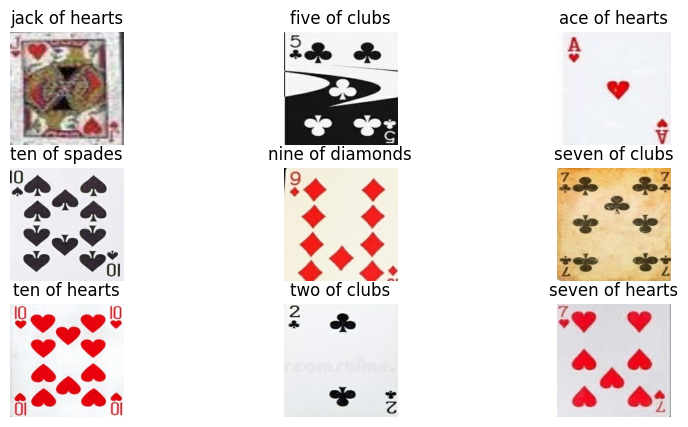

Dataset is ready and randomized! 🚀


In [12]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Function to load and preprocess images
def load_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)  # Convert to RGB
    img = tf.image.resize(img, (224, 224))  # Resize images
    img = img / 255.0  # Normalize pixel values
    return img, label

train_df = df[df['dataset'] == 'train']
valid_df = df[df['dataset'] == 'valid']
test_df = df[df['dataset'] == 'test']

# Create TensorFlow Datasets
def create_tf_dataset(dataframe):
    ds = tf.data.Dataset.from_tensor_slices((dataframe["filepaths"].values, dataframe["label_index"].values))
    ds = ds.map(load_image).shuffle(buffer_size=1000).batch(16, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
    return ds

train_ds = create_tf_dataset(train_df)
valid_ds = create_tf_dataset(valid_df)
test_ds = create_tf_dataset(test_df)

# Preview some training images
plt.figure(figsize=(10, 5))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
plt.show()

print("Dataset is ready and randomized! 🚀")

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),  # Define input shape here
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 3),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Multi-class classification
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 34, 34, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 17, 17, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 15, 15, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 53)                  │          13,621 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,987,381 (30.47 MB)

 Trainable params: 7,987,381 (30.47 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

epochs = 20  # Adjust based on dataset size
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - accuracy: 0.0740 - loss: 3.7245 - val_accuracy: 0.4414 - val_loss: 1.8445
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.3296 - loss: 2.3068 - val_accuracy: 0.6641 - val_loss: 1.1581
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.5419 - loss: 1.6540 - val_accuracy: 0.7695 - val_loss: 0.8718
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.6251 - loss: 1.3178 - val_accuracy: 0.8164 - val_loss: 0.7053
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.6941 - loss: 1.0795 - val_accuracy: 0.8242 - val_loss: 0.6689
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 43s 75ms/step - accuracy: 0.7320 - loss: 0.9077 - val_accuracy: 0.8359 - val_loss: 0.6877
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.7764 - loss: 0.7591 - val_accuracy: 0.8320 - val_loss: 0.5796
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - accuracy: 0.8038 - loss: 0.6337 - 

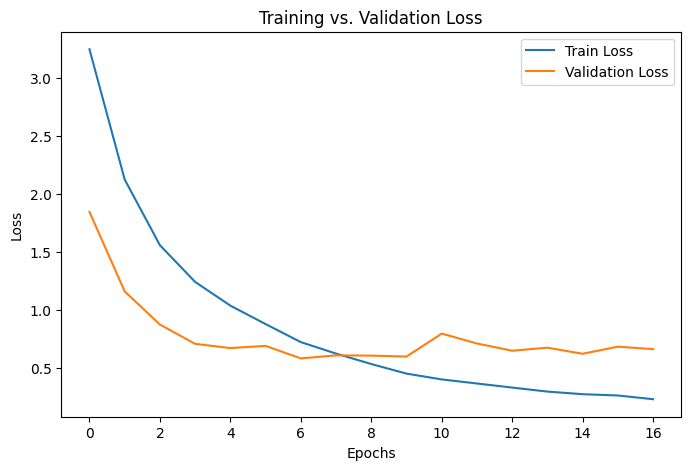

In [15]:
import matplotlib.pyplot as plt

# Get loss values from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.show()

In [16]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8333 - loss: 0.7683
Test Accuracy: 83.59%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


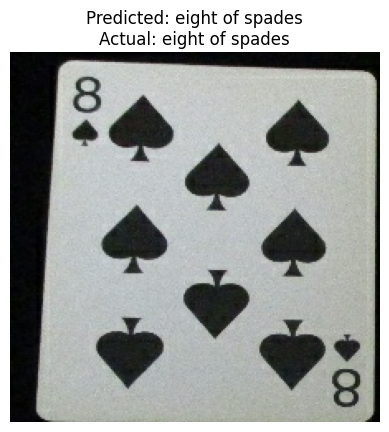

In [22]:
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Randomly choose an image from test_df
random_row = test_df.sample(n=1).iloc[0]
image_path = random_row["filepaths"]
true_label = random_row["label_index"]  # True class index

# Function to preprocess a single image
def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)  # Convert to RGB
    img = tf.image.resize(img, (224, 224))  # Resize to match model input
    img = img / 255.0  # Normalize
    return tf.expand_dims(img, axis=0)  # Add batch dimension

# Preprocess the image
test_image = preprocess_image(image_path)

# Predict the class
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)  # Get the highest probability index

# Map class index to class name
predicted_label = class_names[predicted_class]
true_label_name = class_names[true_label]

# Display the image with prediction
plt.imshow(tf.squeeze(test_image))  # Remove batch dimension for display
plt.title(f"Predicted: {predicted_label}\nActual: {true_label_name}")
plt.axis("off")
plt.show()

In [23]:
model.save("model.h5")